In [ ]:
NOTEBOOK: CREATE BAR CHART FOR HOSP

### Read few rows from the CSV file
CSV File contains ebird information of all localities where number of complete checklist >=50

- **Note: Right now we only use 500 rows from the hotspot so it will run in seconds but it takes more time when whole file is read (defintely not seconds)**
- **Question: Can this be made much faster ?**

In [1]:
from pandas.io.common import EmptyDataError
import pandas as pd
import numpy as np

# This file has info of only those hotspots where number of checklist is greater than 50
csv_file = '/miniscratch/tengmeli/ecosystem-embedding/data/usa_hotspot_data_2.csv'
file = pd.read_csv(csv_file, nrows=500)
df_1 = file.iloc[0:10,10:30]
df_1

,BREEDING BIRD ATLAS CODE,BREEDING BIRD ATLAS CATEGORY,AGE/SEX,COUNTRY,COUNTRY CODE,STATE,STATE CODE,COUNTY,COUNTY CODE,IBA CODE,BCR CODE,USFWS CODE,ATLAS BLOCK,LOCALITY,LOCALITY ID,LOCALITY TYPE,LATITUDE,LONGITUDE,OBSERVATION DATE,TIME OBSERVATIONS STARTED
0,NaN,NaN,NaN,United States,US,New Jersey,US-NJ,Monmouth,US-NJ-025,US-NJ_3151,NaN,NaN,NaN,Sandy Hook,L197353,H,40.439252,-73.986926,1997-10-11,NaN
1,NaN,NaN,NaN,United States,US,Washington,US-WA,Kitsap,US-WA-035,NaN,NaN,NaN,NaN,Point No Point,L109542,H,47.911870,-122.528318,1998-10-30,09:30:00
2,NaN,NaN,NaN,United States,US,Massachusetts,US-MA,Middlesex,US-MA-017,US-MA_701,30.0,NaN,NaN,Mt. Auburn Cemetery,L207391,H,42.371000,-71.146000,1990-05-22,06:00:00
3,NaN,NaN,NaN,United States,US,Washington,US-WA,Kitsap,US-WA-035,NaN,NaN,NaN,NaN,Point No Point,L109542,H,47.911870,-122.528318,1997-05-08,06:15:00
4,NaN,NaN,NaN,United States,US,Massachusetts,US-MA,Plymouth,US-MA-023,US-MA_638,30.0,NaN,NaN,Plymouth Beach,L269491,H,41.976566,-70.650545,1982-08-03,NaN
5,NaN,NaN,NaN,United States,US,Massachusetts,US-MA,Middlesex,US-MA-017,US-MA_701,30.0,NaN,NaN,Mt. Auburn Cemetery,L207391,H,42.371000,-71.146000,1990-05-18,NaN
6,NaN,NaN,NaN,United States,US,New York,US-NY,Suffolk,US-NY-103,US-NY_1757,NaN,NaN,NaN,Robert Moses SP,L268000,H,40.624270,-73.262234,1999-09-09,08:30:00
7,NaN,NaN,NaN,United States,US,Massachusetts,US-MA,Middlesex,US-MA-017,US-MA_701,30.0,NaN,NaN,Mt. Auburn Cemetery,L207391,H,42.371000,-71.146000,1988-04-25,06:00:00
8,NaN,NaN,NaN,United States,US,Massachusetts,US-MA,Middlesex,US-MA-017,US-MA_701,30.0,NaN,NaN,Mt. Auburn Cemetery,L207391,H,42.371000,-71.146000,1988-04-25,06:00:00
9,NaN,NaN,NaN,United States,US,Washington,US-WA,Snohomish,US-WA-061,NaN,5.0,NaN,NaN,Edmonds Waterfront,L374382,H,47.811927,-122.385414,1999-07-24,NaN


### Read ABA checklist file

In [2]:
aba_csv = 'ABA_Checklist-8.0.8.csv'
aba_file = pd.read_csv(aba_csv, delimiter=',', names=["TYPE", "COMMON-NAME", "FRENCH-NAME", "ENGLISH-NAME", "CODE", "CODE-NUMBER"])
aba_file.fillna('', inplace=True)

#### Filter species with Code 1 and 2 in ABA checklist
Save the files as `aba_twos_and_ones.csv`

In [3]:
aba_twos_and_ones = aba_file[((aba_file["CODE-NUMBER"] == 1.0) | (aba_file["CODE-NUMBER"] == 2.0))]
aba_twos_and_ones.to_csv('aba_twos_and_ones.csv', index = False)
aba_twos_and_ones

,TYPE,COMMON-NAME,FRENCH-NAME,ENGLISH-NAME,CODE,CODE-NUMBER
2,,Black-bellied Whistling-Duck,Dendrocygne à ventre noir,Dendrocygna autumnalis,BBWD,1
3,,Fulvous Whistling-Duck,Dendrocygne fauve,Dendrocygna bicolor,FUWD,1
4,,Emperor Goose,Oie empereur,Anser canagicus,EMGO,2
5,,Snow Goose,Oie des neiges,Anser caerulescens,SNGO,1
6,,Ross's Goose,Oie de Ross,Anser rossii,ROGO,1
...,...,...,...,...,...,...
1212,,Painted Bunting,Passerin nonpareil,Passerina ciris,PABU,1
1213,,Dickcissel,Dickcissel d'Amérique,Spiza americana,DICK,1
1215,,Red-crested Cardinal,Paroare huppé,Paroaria coronata,RCCA,2
1216,,Yellow-billed Cardinal,Paroare à bec jaune,Paroaria capitata,YBCA,2


#### Get the `COMMON-NAME` as list

In [4]:
aba_common_name_list = aba_twos_and_ones['COMMON-NAME'].tolist()
# aba_common_name_list

### Test for a single hotspot
Hotspot Example: L109542. Note: We are only chosing this hotspot information from first 500 line sof the ebird csv file

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
state_bird_all_info = file.loc[file['LOCALITY ID'] == 'L109542'] #L197353
state_bird_all_info.head()

,Unnamed: 0,GLOBAL UNIQUE IDENTIFIER,LAST EDITED DATE,TAXONOMIC ORDER,CATEGORY,COMMON NAME,SCIENTIFIC NAME,SUBSPECIES COMMON NAME,SUBSPECIES SCIENTIFIC NAME,OBSERVATION COUNT,...,EFFORT AREA HA,NUMBER OBSERVERS,ALL SPECIES REPORTED,GROUP IDENTIFIER,HAS MEDIA,APPROVED,REVIEWED,REASON,TRIP COMMENTS,SPECIES COMMENTS
1,19927,URN:CornellLabOfOrnithology:EBIRD:OBS458928199,2019-07-23 18:23:17,6132,species,Common Murre,Uria aalge,NaN,NaN,96,...,NaN,1.0,1,NaN,0,1,0,NaN,"Cloudy/haze, 46 degrees, 11.4 high at 1256",NaN
3,19934,URN:CornellLabOfOrnithology:EBIRD:OBS573028739,2019-07-23 18:22:55,7092,species,Great Blue Heron,Ardea herodias,NaN,NaN,1,...,NaN,1.0,1,NaN,0,1,0,NaN,"seawatch, various times",NaN
14,19964,URN:CornellLabOfOrnithology:EBIRD:OBS368107166,2016-01-23 16:10:56,32501,species,Red-winged Blackbird,Agelaius phoeniceus,NaN,NaN,X,...,NaN,1.0,0,NaN,0,1,0,NaN,NaN,NaN
16,19968,URN:CornellLabOfOrnithology:EBIRD:OBS233827050,2014-02-13 11:01:20,6315,species,Glaucous-winged Gull,Larus glaucescens,NaN,NaN,X,...,NaN,1.0,0,NaN,0,1,0,NaN,NaN,NaN
17,19981,URN:CornellLabOfOrnithology:EBIRD:OBS511798713,2017-06-22 15:19:37,641,species,Bufflehead,Bucephala albeola,NaN,NaN,2,...,NaN,1.0,1,NaN,0,1,0,NaN,"Cloudy, calm, 44 degrees. Low tide at 1230",NaN


### Select only the values which are a part of aba_common_name list (i.e. code 1 and code2)

In [7]:
# This should be done before
state_bird_info = state_bird_all_info[state_bird_all_info["COMMON NAME"].isin(aba_common_name_list)]

### Extract months from the date and Time (to be used in bar chart)

In [8]:
state_bird_info['LAST EDITED DATE'] = pd.to_datetime(state_bird_info['LAST EDITED DATE'])
state_bird_info.head()

,Unnamed: 0,GLOBAL UNIQUE IDENTIFIER,LAST EDITED DATE,TAXONOMIC ORDER,CATEGORY,COMMON NAME,SCIENTIFIC NAME,SUBSPECIES COMMON NAME,SUBSPECIES SCIENTIFIC NAME,OBSERVATION COUNT,...,EFFORT AREA HA,NUMBER OBSERVERS,ALL SPECIES REPORTED,GROUP IDENTIFIER,HAS MEDIA,APPROVED,REVIEWED,REASON,TRIP COMMENTS,SPECIES COMMENTS
1,19927,URN:CornellLabOfOrnithology:EBIRD:OBS458928199,2019-07-23 18:23:17,6132,species,Common Murre,Uria aalge,NaN,NaN,96,...,NaN,1.0,1,NaN,0,1,0,NaN,"Cloudy/haze, 46 degrees, 11.4 high at 1256",NaN
3,19934,URN:CornellLabOfOrnithology:EBIRD:OBS573028739,2019-07-23 18:22:55,7092,species,Great Blue Heron,Ardea herodias,NaN,NaN,1,...,NaN,1.0,1,NaN,0,1,0,NaN,"seawatch, various times",NaN
14,19964,URN:CornellLabOfOrnithology:EBIRD:OBS368107166,2016-01-23 16:10:56,32501,species,Red-winged Blackbird,Agelaius phoeniceus,NaN,NaN,X,...,NaN,1.0,0,NaN,0,1,0,NaN,NaN,NaN
16,19968,URN:CornellLabOfOrnithology:EBIRD:OBS233827050,2014-02-13 11:01:20,6315,species,Glaucous-winged Gull,Larus glaucescens,NaN,NaN,X,...,NaN,1.0,0,NaN,0,1,0,NaN,NaN,NaN
17,19981,URN:CornellLabOfOrnithology:EBIRD:OBS511798713,2017-06-22 15:19:37,641,species,Bufflehead,Bucephala albeola,NaN,NaN,2,...,NaN,1.0,1,NaN,0,1,0,NaN,"Cloudy, calm, 44 degrees. Low tide at 1230",NaN


In [9]:
state_bird_info['Month'] = state_bird_info['LAST EDITED DATE'].dt.month_name()

if 'MONTH' not in state_bird_info:
    state_bird_info.insert(state_bird_info.columns.get_loc('LAST EDITED DATE'), 'MONTH', state_bird_info['Month'] )
state_bird_info.head()

,Unnamed: 0,GLOBAL UNIQUE IDENTIFIER,MONTH,LAST EDITED DATE,TAXONOMIC ORDER,CATEGORY,COMMON NAME,SCIENTIFIC NAME,SUBSPECIES COMMON NAME,SUBSPECIES SCIENTIFIC NAME,...,NUMBER OBSERVERS,ALL SPECIES REPORTED,GROUP IDENTIFIER,HAS MEDIA,APPROVED,REVIEWED,REASON,TRIP COMMENTS,SPECIES COMMENTS,Month
1,19927,URN:CornellLabOfOrnithology:EBIRD:OBS458928199,July,2019-07-23 18:23:17,6132,species,Common Murre,Uria aalge,NaN,NaN,...,1.0,1,NaN,0,1,0,NaN,"Cloudy/haze, 46 degrees, 11.4 high at 1256",NaN,July
3,19934,URN:CornellLabOfOrnithology:EBIRD:OBS573028739,July,2019-07-23 18:22:55,7092,species,Great Blue Heron,Ardea herodias,NaN,NaN,...,1.0,1,NaN,0,1,0,NaN,"seawatch, various times",NaN,July
14,19964,URN:CornellLabOfOrnithology:EBIRD:OBS368107166,January,2016-01-23 16:10:56,32501,species,Red-winged Blackbird,Agelaius phoeniceus,NaN,NaN,...,1.0,0,NaN,0,1,0,NaN,NaN,NaN,January
16,19968,URN:CornellLabOfOrnithology:EBIRD:OBS233827050,February,2014-02-13 11:01:20,6315,species,Glaucous-winged Gull,Larus glaucescens,NaN,NaN,...,1.0,0,NaN,0,1,0,NaN,NaN,NaN,February
17,19981,URN:CornellLabOfOrnithology:EBIRD:OBS511798713,June,2017-06-22 15:19:37,641,species,Bufflehead,Bucephala albeola,NaN,NaN,...,1.0,1,NaN,0,1,0,NaN,"Cloudy, calm, 44 degrees. Low tide at 1230",NaN,June


* To verify if `MONTH` column has correct columns use : `state_bird_month[state_bird_month["MONTH"].apply(lambda x:x not in months)]`
* To verify if `['OBSERVATION COUNT']` has only numeric values, ue: `state_bird_month.loc[~state_bird_month['OBSERVATION COUNT'].astype(str).str.isdigit()]`
* To verfy if any column has NaN values, use something like: `state_bird_month['COMMON NAME'].isnull().values.any()`

### Filter sected column which will ne needed to make bar chart
Columns needed are: "LOCALITY ID", "OBSERVATION COUNT", "COMMON NAME", "MONTH", "ALL SPECIES REPORTED"

In [10]:
state_bird_month = state_bird_info[["LOCALITY ID", "OBSERVATION COUNT", "COMMON NAME", "MONTH", "ALL SPECIES REPORTED"]]
state_bird_month = state_bird_month[state_bird_month["ALL SPECIES REPORTED"] == 1]

### Sort the filtered data with respect to column

In [11]:
import calendar

months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
state_bird_month['MONTH'] = pd.Categorical(state_bird_month['MONTH'], categories=months, ordered=True)
state_bird_month.sort_values(by='MONTH',inplace=True) # Sort from Jan - December
state_bird_month['MONTH'] = state_bird_month['MONTH'].astype(object)
state_bird_month.head()

,LOCALITY ID,OBSERVATION COUNT,COMMON NAME,MONTH,ALL SPECIES REPORTED
225,L109542,5,Horned Grebe,January,1
142,L109542,25,California Gull,January,1
363,L109542,17,Common Tern,January,1
71,L109542,3,Common Loon,January,1
63,L109542,5,Surf Scoter,January,1


### Verify the values are correct after filteration

In [12]:

old_df = state_bird_info[(state_bird_info["COMMON NAME"] == "Caspian Tern") & 
                (state_bird_info["MONTH"] == "January")
                        ]
new_df = state_bird_month[(state_bird_month["COMMON NAME"] == "Caspian Tern") & 
                (state_bird_month["MONTH"] == "January")
                         ]
                         
print("Old DF:", old_df[["OBSERVATION COUNT", "ALL SPECIES REPORTED"]])
print("New DF:", new_df[["OBSERVATION COUNT", "ALL SPECIES REPORTED"]])

Old DF:    OBSERVATION COUNT  ALL SPECIES REPORTED
29                 6                     1
New DF:    OBSERVATION COUNT  ALL SPECIES REPORTED
29                 6                     1


### Map the months (string) with numbers for proper sorting 

In [13]:
months_dict = {"January":1, "February":2, "March":3, "April":4, "May":5, "June":6,
          "July":7, "August":8, "September":9, "October":10, "November":11, "December":12
         }
state_bird_month_num = state_bird_month.MONTH.map(months_dict)

if 'Month_Num' not in state_bird_month:
    state_bird_month.insert(0, "Month_Num", state_bird_month_num)
state_bird_month.head()

,Month_Num,LOCALITY ID,OBSERVATION COUNT,COMMON NAME,MONTH,ALL SPECIES REPORTED
225,1,L109542,5,Horned Grebe,January,1
142,1,L109542,25,California Gull,January,1
363,1,L109542,17,Common Tern,January,1
71,1,L109542,3,Common Loon,January,1
63,1,L109542,5,Surf Scoter,January,1


### Create bar chart data

In [14]:
state_bird_month_sum = state_bird_month.groupby(['Month_Num','MONTH','COMMON NAME'])[['ALL SPECIES REPORTED']].agg('sum')
state_bird_month_sum

ALL SPECIES REPORTED
Month_Num MONTH    COMMON NAME                                   
1         January  American Robin                               1
                   Bald Eagle                                   1
                   California Gull                              1
                   Caspian Tern                                 1
                   Common Loon                                  1
                   Common Tern                                  1
                   Horned Grebe                                 2
                   Pelagic Cormorant                            1
                   Surf Scoter                                  1
2         February Common Tern                                  1
                   Pigeon Guillemot                             1
6         June     Bufflehead                                   1
7         July     American Robin                               1
                   Bonaparte's Gull                             1
                   Brant                                        1
                   Bufflehead                                   2
                   Clark's Grebe                                1
                   Common Murre                                 2
                   Common Tern                                  1
                   Double-crested Cormorant                     2
                   European Starling                            1
                   Glaucous-winged Gull                         1
                   Great Blue Heron                             1
                   Mallard                                      1
                   Mew Gull                                     1
                   Pacific Loon                                 2
                   Red-breasted Merganser                       1
                   Red-necked Grebe                             1
                   Red-winged Blackbird                         1
                   Rhinoceros Auklet                            1
                   Song Sparrow                                 1
                   Surf Scoter                                  2
                   Western Grebe                                1
                   White-winged Scoter                          1
                   Yellow-rumped Warbler                        1
8         August   Bonaparte's Gull                             1
                   Northern Flicker                             1
                   Pacific Wren                                 1
10        October  Rock Pigeon                                  1
12        December Heermann's Gull                              1

### Plot bar Chart

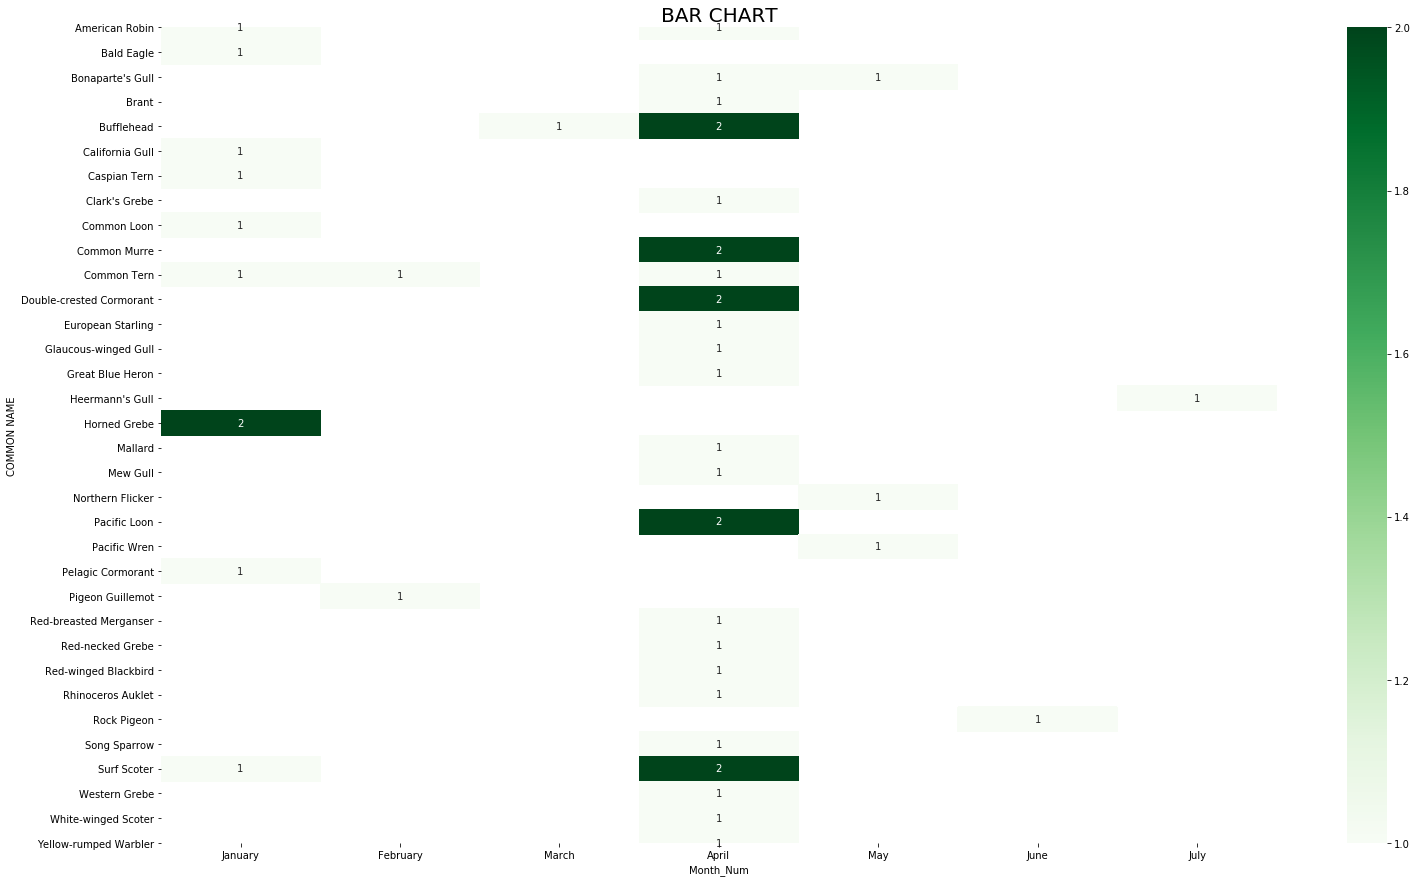

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df_temp = state_bird_month_sum.pivot_table("ALL SPECIES REPORTED", "COMMON NAME", "Month_Num")

plt.figure(figsize = (25,15))
plt.title("BAR CHART", size=20)
# sns.light_palette("seagreen", as_cmap=True)
ax = sns.heatmap(df_temp, annot = True, cmap = "Greens")
ax.set_xticklabels(months, rotation='horizontal', fontsize=10)
plt.show()